## HR analysis
### Introduction :
Why are our best and most experienced employees leaving prematurely? Have fun with this database and try to predict which valuable employees will leave next. Fields in the dataset include:
* 满意度 (satisfaction_level)
* 最近一次评价 (last_evaluation)
* 员工所做项目数量 (number_project)
* 平均每个月的工作时长 (average_montly_hours)
* 入职时间 (time_spend_company)
* 是否有工作事故 (Work_accident)
* 最近五年是否有晋升 (promotion_last_5years)
* 员工部门 (department)
* 薪资水平 (salary)
* 是否辞职 (left)

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('HR.csv', error_bad_lines=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 10 columns):
satisfaction_level       15000 non-null float64
last_evaluation          15002 non-null float64
number_project           15002 non-null int64
average_monthly_hours    15002 non-null int64
time_spend_company       15002 non-null int64
Work_accident            15002 non-null int64
left                     15002 non-null int64
promotion_last_5years    15002 non-null int64
department               15002 non-null object
salary                   15002 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
type(df['satisfaction_level'])

pandas.core.series.Series

In [6]:
# 均值，标准差，最小值，下四分位数，二分位数，上四分位数，最大值
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,15000.000000,15002.000000,15002.000000,15002.000000,15002.000000,15002.000000,15002.000000,15002.000000
mean,0.612839,67.373732,3.802693,201.041728,3.498067,0.144581,0.238235,0.021264
std,0.248623,8164.407524,1.232733,49.941815,1.460053,0.351689,0.426018,0.144267
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,999999.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# 众数
df.mode()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 方差
df.var()

satisfaction_level       6.181359e-02
last_evaluation          6.665755e+07
number_project           1.519630e+00
average_monthly_hours    2.494185e+03
time_spend_company       2.131754e+00
Work_accident            1.236854e-01
left                     1.814911e-01
promotion_last_5years    2.081307e-02
dtype: float64

In [9]:
# 偏态系数
df['satisfaction_level'].skew()

-0.47643761717258093

偏态系数小于0，说明负偏，大部分值大于均值。也就是说大部分人满意度可以。

In [10]:
# 峰态系数
df['satisfaction_level'].kurt()

-0.6706959323886252

峰态系数小于0, 说明比正态分布要平缓一些

In [11]:
# 正态分布 'mvsk'分别为mean, var, skew, kurt
stats.norm.stats(moments='mvsk')

(array(0.), array(1.), array(0.), array(0.))

In [12]:
# 正太分布x=0所对应的y值
stats.norm.pdf(0.0)

0.3989422804014327

In [14]:
# 从负无穷大到某值的面积
stats.norm.ppf(0.5)

0.0

In [17]:
# 从负无穷累计概率
stats.norm.cdf(0)

0.5

以上正好两个相反

In [19]:
# 10个满足正态分布的数字
stats.norm.rvs(size=10)

array([ 0.67147944,  1.49245366,  1.09946939, -1.45898399, -1.1374231 ,
       -0.30219915,  0.37188266, -0.79380948,  0.28815644, -0.59815976])

In [27]:
# 卡方分布
stats.chi2.stats(moments='mvsk', df=1)

(array(1.), array(2.), array(2.82842712), array(12.))

In [31]:
# t分布
stats.t.stats(moments='mvsk',df=100)

(array(0.), array(1.02040816), array(0.), array(0.0625))

In [34]:
# f分布
stats.f.stats(moments='mvsk', dfn=1, dfd=100)

(array(1.02040816), array(2.14754269), array(2.96302393), array(13.5859894))

In [35]:
# 抽样10个
df.sample(n=10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
12188,0.37,0.55,2,152,3,0,1,0,technical,medium
11568,0.57,0.69,3,212,8,0,0,0,product_mng,low
6995,0.18,0.46,5,202,4,0,0,0,support,medium
12902,1.00,0.93,5,231,2,0,0,0,marketing,medium
4133,0.52,0.80,5,234,3,0,0,0,sales,high
6155,0.46,0.75,6,276,6,0,0,0,support,low
11400,0.15,0.75,3,150,4,0,0,1,accounting,medium
9438,0.65,0.85,4,233,2,0,0,0,support,low
1747,0.39,0.48,2,159,3,0,1,0,product_mng,medium
10693,0.73,0.97,4,163,3,0,0,0,sales,medium


In [38]:
# 抽样数量百分比
df.sample(frac=0.0005)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
7075,0.30,0.47,6,156,2,1,0,0,support,medium
2991,0.90,0.77,3,156,3,0,0,0,sales,medium
5616,0.49,0.99,6,205,5,0,0,0,technical,high
1744,0.40,0.48,2,161,3,0,1,0,IT,medium
8517,0.15,0.48,6,218,6,0,0,0,technical,low
10000,0.93,0.49,4,255,2,0,0,0,management,high
1606,0.89,0.48,3,178,5,0,1,0,accounting,low
5425,0.50,0.51,3,169,4,0,0,0,marketing,low


### 对 satisfaction_level 一列进行异常值分析和分布分析

In [39]:
sl = df['satisfaction_level']
sl.isnull()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
14972    False
14973    False
14974    False
14975    False
14976    False
14977    False
14978    False
14979    False
14980    False
14981    False
14982    False
14983    False
14984    False
14985    False
14986    False
14987    False
14988    False
14989    False
14990    False
14991    False
14992    False
14993    False
14994    False
14995    False
14996    False
14997    False
14998    False
14999     True
15000     True
15001    False
Name: satisfaction_level, Length: 15002, dtype: bool

In [40]:
sl[sl.isnull()]

14999   NaN
15000   NaN
Name: satisfaction_level, dtype: float64

In [41]:
df[df['satisfaction_level'].isnull()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14999,NaN,0.52,2,158,3,0,1,0,support,low
15000,NaN,999999.00,2,158,3,0,1,0,sale,low


In [42]:
# fillna
sl = sl.dropna()
sl[sl.isnull()]

Series([], Name: satisfaction_level, dtype: float64)

异常值去掉了

In [43]:
sl.mean()

0.6128393333333343

In [44]:
sl.max()

1.0

In [45]:
sl.min()

0.09

In [46]:
sl.var()

0.06181358575860858

In [47]:
sl.median()

0.64

In [48]:
sl.quantile(q=0.25)

0.44

In [50]:
sl.quantile(q=0.75)

0.82

从上面数据看出去掉异常值后分布还算正常

In [51]:
sl.skew()

-0.47643761717258093

In [52]:
sl.kurt()

-0.6706959323886252

In [54]:
# 直方图, 把连续值分成10份
np.histogram(sl.values, bins=np.arange(0.0, 1.1, 0.1))

(array([ 195, 1214,  532,  974, 1668, 2146, 1973, 2074, 2220, 2004]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

大部分值集中在后半部分，符合偏态系数小于0的结果

### 对 last_evaluation 一列进行异常值分析

In [55]:
le = df['last_evaluation']
le[le.isnull()]

Series([], Name: last_evaluation, dtype: float64)

In [56]:
le.mean()

67.37373216904412

In [57]:
le.std()

8164.407523745649

In [58]:
le.median()

0.72

In [59]:
le.max()

999999.0

从分析结果得出肯定有异常大值对所有数据产生了影响

In [60]:
le[le>1]

15000    999999.0
Name: last_evaluation, dtype: float64

仅有一值偏离正常

In [64]:
le = le[le<=1]
le

0        0.53
1        0.86
2        0.88
3        0.87
4        0.52
5        0.50
6        0.77
7        0.85
8        1.00
9        0.53
10       0.54
11       0.81
12       0.92
13       0.55
14       0.56
15       0.54
16       0.47
17       0.99
18       0.51
19       0.89
20       0.83
21       0.55
22       0.95
23       0.57
24       0.53
25       0.92
26       0.87
27       0.49
28       0.46
29       0.50
         ... 
14971    0.45
14972    0.97
14973    0.52
14974    0.54
14975    0.79
14976    0.47
14977    0.85
14978    0.47
14979    0.93
14980    0.89
14981    0.93
14982    0.49
14983    0.84
14984    0.56
14985    0.99
14986    0.85
14987    0.70
14988    0.55
14989    0.57
14990    0.88
14991    0.81
14992    0.48
14993    0.83
14994    0.57
14995    0.48
14996    0.53
14997    0.96
14998    0.52
14999    0.52
15001    0.40
Name: last_evaluation, Length: 15001, dtype: float64

#### 换一种提取异常值方法  根据上四分位数和下四分位数判断

In [71]:
le_s = df['last_evaluation']
q_low = le_s.quantile(q=0.25)
q_high = le_s.quantile(q=0.75)
q_interval = q_high-q_low
# 允许型变参数 k = 1.5 ,2, 3都满足，因为异常值差距太大了
k = 1.5
le_s = le_s[le_s<q_high+k*q_interval][le_s>q_low-k*q_interval]
le_s

0        0.53
1        0.86
2        0.88
3        0.87
4        0.52
5        0.50
6        0.77
7        0.85
8        1.00
9        0.53
10       0.54
11       0.81
12       0.92
13       0.55
14       0.56
15       0.54
16       0.47
17       0.99
18       0.51
19       0.89
20       0.83
21       0.55
22       0.95
23       0.57
24       0.53
25       0.92
26       0.87
27       0.49
28       0.46
29       0.50
         ... 
14971    0.45
14972    0.97
14973    0.52
14974    0.54
14975    0.79
14976    0.47
14977    0.85
14978    0.47
14979    0.93
14980    0.89
14981    0.93
14982    0.49
14983    0.84
14984    0.56
14985    0.99
14986    0.85
14987    0.70
14988    0.55
14989    0.57
14990    0.88
14991    0.81
14992    0.48
14993    0.83
14994    0.57
14995    0.48
14996    0.53
14997    0.96
14998    0.52
14999    0.52
15001    0.40
Name: last_evaluation, Length: 15001, dtype: float64

异常值第 15000 行也被删除掉了

In [72]:
len(le_s)

15001

In [73]:
len(le)

15001

In [75]:
np.histogram(le.values, bins=np.arange(0.0, 1.1, 0.1))

(array([   0,    0,    0,  179, 1390, 3396, 2234, 2062, 2752, 2988]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [76]:
le.mean()

0.7160675954936238

In [77]:
le.std()

0.17118464250786247

In [78]:
le.median()

0.72

In [79]:
le.max()

1.0

In [80]:
le.skew()

-0.02653253746872579

In [81]:
le.kurt()

-1.2390454655108427

现在看来指标都还算正常了

### 对 number_project 一列静态结构分析

In [84]:
np_s = df['number_project']
np_s[np_s.isnull()]

Series([], Name: number_project, dtype: int64)

In [85]:
np_s.mean()

3.8026929742700974

In [86]:
np_s.std()

1.2327327792005955

In [87]:
np_s.median()

4.0

In [88]:
np_s.max()

7

In [89]:
np_s.min()

2

In [90]:
np_s.skew()

0.3377744235231047

偏态系数为正，说明大部分人项目的数量是小于均值的

In [91]:
np_s.kurt()

-0.49580962709450604

In [95]:
# 针对离散值做简单统计
np_s.value_counts().sort_index()

2    2391
3    4055
4    4365
5    2761
6    1174
7     256
Name: number_project, dtype: int64

In [94]:
# 获得统计比例
np_s.value_counts(normalize=True).sort_index()

2    0.159379
3    0.270297
4    0.290961
5    0.184042
6    0.078256
7    0.017064
Name: number_project, dtype: float64

### 对 average_monthly_hours 一列分析

In [96]:
amh = df['average_monthly_hours']
amh.mean()

201.0417277696307

In [97]:
amh.std()

49.94181527437911

In [98]:
amh.max()

310

In [99]:
amh.min()

96

In [100]:
amh.skew()

0.05322458779916304

In [101]:
amh.kurt()

-1.1350158577565719

In [102]:
q_low = amh.quantile(0.25)
q_high = amh.quantile(0.75)
q_inter = q_high-q_low
amh=amh[amh< q_high+1.5*(q_high-q_low)][amh>q_low-1.5*(q_high-q_low)]
len(amh)

15002

In [104]:
# 从最小值开始开始分布，步长为10
np.histogram(amh.values, bins=np.arange(amh.min(), amh.max()+10, 10))

(array([ 168,  171,  147,  807, 1153, 1234, 1075,  824,  818,  758,  751,
         738,  856,  824,  987, 1002, 1045,  935,  299,  193,  131,   86]),
 array([ 96, 106, 116, 126, 136, 146, 156, 166, 176, 186, 196, 206, 216,
        226, 236, 246, 256, 266, 276, 286, 296, 306, 316]))

In [106]:
amh.value_counts(bins=np.arange(amh.min(), amh.max()+10, 10)).sort_index()

(95.999, 106.0]     187
(106.0, 116.0]      162
(116.0, 126.0]      162
(126.0, 136.0]      886
(136.0, 146.0]     1159
(146.0, 156.0]     1277
(156.0, 166.0]      995
(166.0, 176.0]      832
(176.0, 186.0]      813
(186.0, 196.0]      761
(196.0, 206.0]      755
(206.0, 216.0]      731
(216.0, 226.0]      873
(226.0, 236.0]      814
(236.0, 246.0]     1006
(246.0, 256.0]      987
(256.0, 266.0]     1063
(266.0, 276.0]      860
(276.0, 286.0]      319
(286.0, 296.0]      164
(296.0, 306.0]      128
(306.0, 316.0]       68
Name: average_monthly_hours, dtype: int64

同样是直方图统计，两种方法有一定差别。第一种是左闭右开，第二种是左开右闭。

### 对 time_spend_company 一列分析

In [107]:
tsc = df['time_spend_company']
tsc.value_counts().sort_index()

2     3245
3     6445
4     2557
5     1473
6      718
7      188
8      162
10     214
Name: time_spend_company, dtype: int64

大部分员工工作三年左右

### 对 Work_accident 一列分析

In [110]:
wa = df['Work_accident']
wa.value_counts(normalize=True).sort_index()

0    0.855419
1    0.144581
Name: Work_accident, dtype: float64

大部分人工作期间是没有事故的, 事故率为0.144

### 对 left 一列分析

In [111]:
l = df['left']
l.value_counts().sort_index()

0    11428
1     3574
Name: left, dtype: int64

### 对 promotion_last_5years 一列分析

In [112]:
pl5 = df['promotion_last_5years']
pl5.value_counts()

0    14683
1      319
Name: promotion_last_5years, dtype: int64

大部分人5年内得到了晋升

### 对 salary 一列分析

In [114]:
sa = df['salary']
sa.value_counts()

low       7318
medium    6446
high      1237
nme          1
Name: salary, dtype: int64

有一行异常值

In [116]:
sa.where(sa != 'nme').dropna()

0           low
1        medium
2        medium
3           low
4           low
5           low
6           low
7           low
8           low
9           low
10          low
11          low
12          low
13          low
14          low
15          low
16          low
17          low
18          low
19          low
20          low
21          low
22          low
23          low
24          low
25          low
26          low
27          low
28          low
29          low
          ...  
14971    medium
14972    medium
14973    medium
14974    medium
14975    medium
14976    medium
14977    medium
14978    medium
14979    medium
14980      high
14981       low
14982    medium
14983    medium
14984    medium
14985    medium
14986       low
14987       low
14988       low
14989       low
14990       low
14991       low
14992       low
14993       low
14994       low
14995       low
14996       low
14997       low
14998       low
14999       low
15000       low
Name: salary, Length: 15

In [120]:
sa.where(sa != 'nme').dropna().value_counts(normalize=True)

low       0.487834
medium    0.429705
high      0.082461
Name: salary, dtype: float64

还是中低收入占绝大多数

### 对 department 一列 分析

In [121]:
dep = df['department']
dep.value_counts(normalize=True)

sales          0.275963
technical      0.181309
support        0.148647
IT             0.081789
product_mng    0.060125
marketing      0.057192
RandD          0.052460
accounting     0.051127
hr             0.049260
management     0.041994
sale           0.000133
Name: department, dtype: float64

sale应该是sales，属于异常值，删掉即可

In [124]:
dep = dep.where(dep != 'sale').dropna()
dep.value_counts(normalize=True)

sales          0.276000
technical      0.181333
support        0.148667
IT             0.081800
product_mng    0.060133
marketing      0.057200
RandD          0.052467
accounting     0.051133
hr             0.049267
management     0.042000
Name: department, dtype: float64

## 对所有数据进行聚合处理

In [126]:
df = df.dropna(axis=0, how='any')
df.tail()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low
15001,0.70,0.40,2,158,2,0,1,0,sale,nme


In [128]:
# 数据过滤
df=df[df['last_evaluation']<1][df['salary']!='nme'][df['department']!='sale']

In [129]:
df.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
IT,0.617586,0.713797,3.814662,201.962109,3.464580,0.134267,0.220758,0.002471
RandD,0.620286,0.705766,3.857143,200.055844,3.353247,0.172727,0.142857,0.035065
accounting,0.579380,0.708208,3.811321,200.698113,3.495957,0.126685,0.258760,0.016173
hr,0.595138,0.703636,3.639118,198.001377,3.330579,0.121212,0.282369,0.020661
management,0.619791,0.720000,3.848631,200.880837,4.305958,0.161031,0.138486,0.111111
marketing,0.616335,0.710830,3.686833,199.157770,3.548043,0.161329,0.234875,0.051008
product_mng,0.618225,0.710910,3.800000,199.782022,3.471910,0.146067,0.216854,0.000000
sales,0.611716,0.704070,3.766067,200.546417,3.518099,0.142822,0.237872,0.024132
support,0.616158,0.719076,3.796996,200.674101,3.380519,0.157032,0.243514,0.009103


In [130]:
df.loc[:, ['last_evaluation', 'department']].groupby('department').mean()

,last_evaluation
department,
IT,0.713797
RandD,0.705766
accounting,0.708208
hr,0.703636
management,0.720000
marketing,0.710830
product_mng,0.710910
sales,0.704070
support,0.719076


#### 自定义聚合函数

In [132]:
df.loc[:, ['average_monthly_hours', 'department']].groupby('department')['average_monthly_hours'].apply(lambda x: x.max()-x.min())

department
IT             212
RandD          210
accounting     213
hr             212
management     210
marketing      214
product_mng    212
sales          214
support        214
technical      213
Name: average_monthly_hours, dtype: int64

## 可视化

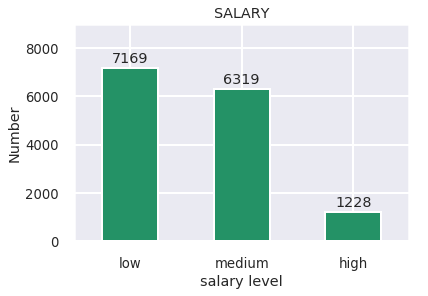

In [159]:
# 条状图
plt.title('SALARY')
# seaborn 丰富背景
sns.set_style(style='darkgrid')
# 字体设置
sns.set_context(context='poster', font_scale=0.6)
# 图形颜色
sns.set_palette('summer')
plt.xlabel('salary level')
plt.ylabel('Number')
plt.xticks(np.arange(len(df['salary'].value_counts())), df['salary'].value_counts().index)
# 设置x，y轴范围
plt.axis([-0.5, 2.5, 0, 9000])
# x轴图对应名称
plt.bar(np.arange(len(df['salary'].value_counts())), df['salary'].value_counts(), width=0.5)
# 把相应数字标注上
for x, y in zip(np.arange(len(df['salary'].value_counts())), df['salary'].value_counts()):
    plt.text(x, y+100, y, ha='center', va='bottom')
plt.show()

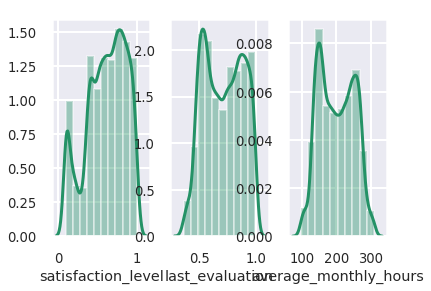

In [167]:
# 直方图 
f=plt.figure()
f.add_subplot(1, 3, 1)
sns.distplot(df['satisfaction_level'], bins=10, kde=True, hist=True)
f.add_subplot(1, 3, 2)
sns.distplot(df['last_evaluation'], bins=10)
f.add_subplot(1, 3, 3)
sns.distplot(df['average_monthly_hours'], bins=10)
plt.show()

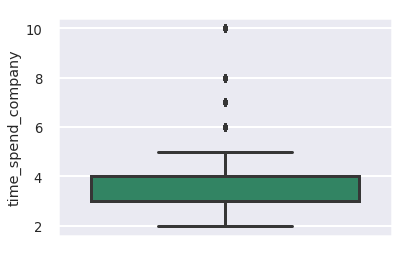

In [171]:
# 箱线图
# whis默认1.5, 上到上四分位，下到下四分位
sns.boxplot(y=df['time_spend_company'], saturation=0.75, whis=1.5)

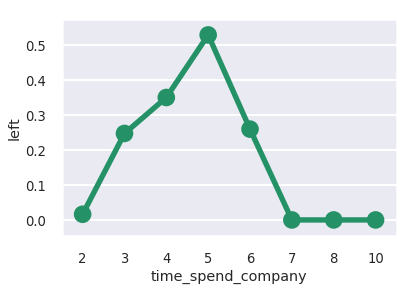

In [172]:
# 折线图
sub_df = df.groupby('time_spend_company').mean()
sns.pointplot(sub_df.index, sub_df['left'])
plt.show()

可以看出工作五年上下离职率最高

/home/f/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


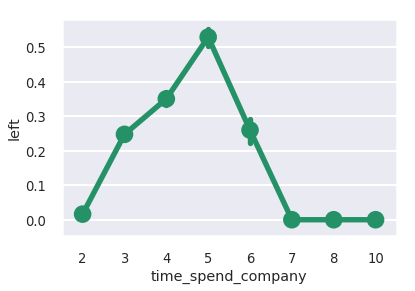

In [173]:
# 效果一样
sns.pointplot(x='time_spend_company', y='left', data=df)

([<matplotlib.patches.Wedge at 0x7ffb13ddf780>,
 [Text(0.7765874365271233, 0.9148289203059945, 'sales'),
  Text(-0.7329437818113272, 0.8202398507169167, 'technical'),
  Text(-1.0794439030861709, -0.21166213664728353, 'support'),
  Text(-0.664814488330916, -0.8763684705107222, 'IT'),
  Text(-0.21834059626457605, -1.0781128809279803, 'product_mng'),
  Text(0.18625757056331738, -1.0841162840801954, 'marketing'),
  Text(0.5413003618109361, -0.9575979940994811, 'RandD'),
  Text(0.8171031260229451, -0.736439054805984, 'accounting'),
  Text(1.0043389117499721, -0.4486684191525873, 'hr'),
  Text(1.0903477335836502, -0.1454022691329033, 'management')],
 [Text(0.45300933797415516, 0.53365020351183, '27.6%'),
  Text(-0.399787517351633, 0.44740355493649997, '18.0%'),
  Text(-0.5887875835015477, -0.11545207453488192, '14.9%'),
  Text(-0.36262608454413603, -0.4780191657331211, '8.2%'),
  Text(-0.11909487068976875, -0.5880615714152619, '6.0%'),
  Text(0.10159503848908219, -0.5913361549528338, '5.7%')

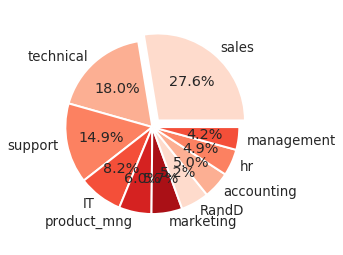

In [184]:
# 饼图
color = sns.color_palette("Reds")
label = df['department'].value_counts().index
value = df['department'].value_counts(normalize=True)
# 突出显示某部分
explodes = [0.1 if i=='sales' else 0 for i in label]
plt.pie(value, labels=label, autopct="%1.1f%%", colors=color, explode=explodes) 